In [ ]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv("messy_HR_data.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               1000 non-null   object
 1   Age                841 non-null    object
 2   Salary             1000 non-null   object
 3   Gender             1000 non-null   object
 4   Department         1000 non-null   object
 5   Position           1000 non-null   object
 6   Joining Date       1000 non-null   object
 7   Performance Score  1000 non-null   object
 8   Email              610 non-null    object
 9   Phone Number       815 non-null    object
dtypes: object(10)
memory usage: 78.3+ KB


,Name,Age,Salary,Gender,Department,Position,Joining Date,Performance Score,Email,Phone Number
count,1000,841,1000,1000,1000,1000,1000,1000,610,815
unique,10,5,6,3,5,5,5,5,3,4
top,alice,thirty,65000,Male,Finance,Assistant,2020/02/20,B,user@domain.com,123-456-7890
freq,118,176,184,355,218,214,232,225,213,236


In [ ]:
df['Phone Number'].str.zfill(11).str.replace('[^a-zA-Z0-9]','')

,Phone Number
0,NaN
1,123-456-7890
2,098-765-4321
3,0000000000
4,098-765-4321
...,...
995,098-765-4321
996,555-555-5555
997,NaN
998,NaN


In [ ]:
df['Name'].astype(str).str.title()

,Name
0,Grace
1,David
2,Hannah
3,Eve
4,Grace
...,...
995,Jack
996,Jack
997,Hannah
998,Bob


In [ ]:
import re
import numpy as np
import pandas as pd

# ✅ Step 0: Load your dataset first
# (Make sure to replace the file path with your correct one)
df = pd.read_csv("/content/messy_HR_data.csv")

# ✅ Define the cleaning function
def parse_salary(x):
    """Convert messy salary strings (like '50k', '$60,000', 'fifty thousand') to numeric."""
    if pd.isna(x):
        return np.nan

    s = str(x).lower().strip()
    if s in ['nan', '', 'none']:
        return np.nan

    # Replace written numbers (basic ones)
    words_to_nums = {
        'ten': 10, 'twenty': 20, 'thirty': 30, 'forty': 40, 'fifty': 50,
        'sixty': 60, 'seventy': 70, 'eighty': 80, 'ninety': 90, 'hundred': 100
    }
    for word, num in words_to_nums.items():
        if word in s:
            s = s.replace(word, str(num))

    # ✅ Remove everything except digits, dot, k, or m
    s = re.sub(r'[^0-9\.km]', '', s)

    # ✅ Handle salary multipliers
    if 'k' in s:
        return float(s.replace('k', '')) * 1_000
    elif 'm' in s:
        return float(s.replace('m', '')) * 1_000_000

    # ✅ Convert to float safely
    try:
        return float(s)
    except ValueError:
        return np.nan


# ✅ Step 1: Apply cleaning function
df['Salary'] = df['Salary'].apply(parse_salary)

# ✅ Step 2: Replace unrealistic low salaries (like 60, 500, etc.) with NaN
df.loc[df['Salary'] < 1000, 'Salary'] = np.nan

# ✅ Step 3: Fill missing with mean between 50,000 and 70,000
custom_mean = (50000 + 70000) / 2
df['Salary'].fillna(custom_mean, inplace=True)

# ✅ Step 4: Round and convert to integer
df['Salary'] = df['Salary'].round().astype(int)

print("✅ Salary column cleaned successfully!")
print(f"Filled missing or invalid values with mean ≈ {int(custom_mean)}")
print(df['Salary'].head(10))


✅ Salary column cleaned successfully!
Filled missing or invalid values with mean ≈ 60000
0    50000
1    65000
2    60000
3    50000
4    60000
5    65000
6    50000
7    50000
8    60000
9    60000
Name: Salary, dtype: int64


/tmp/ipython-input-2981356492.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(custom_mean, inplace=True)


In [ ]:
# Find which column contains the word 'age'
Age = [col for col in df.columns if 'Age' in col][0]

# Convert to numeric (handle text or messy values)
pd.to_numeric(df[Age], errors='coerce')

# Replace unrealistic ages (e.g., <16 or >80) with NaN
df.loc[(df[Age] < 16) | (df[Age] > 80), Age] = np.nan

# Fill missing ages with median
df[Age].fillna(df[Age].median(), inplace=True)

# Convert to integer type
df[Age].astype(int)


/tmp/ipython-input-1766229530.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[Age].fillna(df[Age].median(), inplace=True)


,Age
0,25
1,35
2,35
3,35
4,35
...,...
995,50
996,35
997,35
998,25


In [ ]:
import numpy as np
import re
import pandas as pd

# Load the dataframe
df = pd.read_csv("messy_HR_data.csv")


# Step 1: remove all non-digit characters and assign back
df['Phone Number'] = df['Phone Number'].astype(str).str.replace(r'[^0-9]', '', regex=True)

# Step 2: handle empty strings / NaN and pad to 11 digits
df['Phone Number'] = df['Phone Number'].apply(
    lambda x: x.zfill(11) if isinstance(x, str) and x.isdigit() and len(x) > 0 else np.nan
)
df['Phone Number'].fillna('Unknown', inplace=True)
print(df['Phone Number'].head(10))

0        Unknown
1    01234567890
2    00987654321
3        Unknown
4    00987654321
5        Unknown
6    01234567890
7        Unknown
8    01234567890
9        Unknown
Name: Phone Number, dtype: object


/tmp/ipython-input-3207395682.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Phone Number'].fillna('Unknown', inplace=True)


In [ ]:
df.drop(columns=['Email'], inplace=True)
print(df.columns)


KeyError: "['Email'] not found in axis"

In [ ]:
df['Performance Score'].str.upper().str.strip()
valid_scores = ['A', 'B', 'C', 'D', 'E', 'F']
df.loc[~df['Performance Score'].isin(valid_scores), 'Performance Score'] = np.nan
print(df['Performance Score'].head(10))


0    D
1    F
2    C
3    A
4    F
5    F
6    B
7    C
8    C
9    A
Name: Performance Score, dtype: object


In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print("Rows:", df.shape[0])

Rows: 1000


In [ ]:
df['Gender'].str.strip().str.title()
df['Department'].str.strip().str.title()
df['Position'].str.strip().str.title()

,Position
0,Manager
1,Director
2,Director
3,Manager
4,Manager
...,...
995,Manager
996,Analyst
997,Assistant
998,Manager


In [ ]:
print("Rows:", df.shape[0])
print("Average Salary:", round(df['Salary'].mean(), 5))
print("\nSample cleaned data:")
print(df.head())

Rows: 1000
Average Salary: 50036.943

Sample cleaned data:
       Name  Age  Salary  Gender Department  Position Joining Date  \
0    grace    25   50000    Male         HR   Manager   2018-04-05   
1    david   NaN   65000  Female    Finance  Director          NaN   
2   hannah    35      60  Female      Sales  Director          NaN   
3      eve   NaN   50000  Female         IT   Manager   2018-04-05   
4    grace   NaN   50589  Female    Finance   Manager          NaN   

  Performance Score  Phone Number  
0                 D           NaN  
1                 F  123-456-7890  
2                 C  098-765-4321  
3                 A                
4                 F  098-765-4321  


In [ ]:
import pandas as pd

# Step 1: Convert 'Joining Date' to datetime safely (handles multiple formats)
df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce', dayfirst=False)

# Step 2: Drop or fill invalid date cells (optional)
# df['Joining Date'].fillna(pd.Timestamp("2000-01-01"), inplace=True)  # example fallback

# Step 3: Convert all dates to standard ISO format (YYYY-MM-DD)
df['Joining Date'] = df['Joining Date'].dt.strftime('%Y-%m-%d')

# Step 4: Check results
print(df['Joining Date'].head(10))

0    2018-04-05
1           NaN
2           NaN
3    2018-04-05
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
Name: Joining Date, dtype: object


In [ ]:
from IPython.display import display
display(df)


,Name,Age,Salary,Gender,Department,Position,Joining Date,Performance Score,Phone Number
0,grace,25,50000,Male,HR,Manager,2018-04-05,D,NaN
1,david,NaN,65000,Female,Finance,Director,NaN,F,123-456-7890
2,hannah,35,60,Female,Sales,Director,NaN,C,098-765-4321
3,eve,NaN,50000,Female,IT,Manager,2018-04-05,A,
4,grace,NaN,50589,Female,Finance,Manager,NaN,F,098-765-4321
...,...,...,...,...,...,...,...,...,...
995,jack,50,65000,Female,HR,Manager,NaN,F,098-765-4321
996,jack,thirty,50000,Male,Finance,Analyst,2018-04-05,C,555-555-5555
997,hannah,thirty,70000,Male,IT,Assistant,NaN,D,NaN
998,bob,25,65000,Other,Marketing,Manager,2018-04-05,D,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8, 5)

# -------------------------------
# 1️⃣ BASIC INFO & SUMMARY STATS
# -------------------------------
print("✅ Dataset Info:")
print(df.info())
print("\n✅ Basic Statistics:")
print(df.describe(include='all').T)

print("\n✅ Missing Values:")
print(df.isnull().sum())


✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               1000 non-null   object
 1   Age                841 non-null    object
 2   Salary             1000 non-null   int64 
 3   Gender             1000 non-null   object
 4   Department         1000 non-null   object
 5   Position           1000 non-null   object
 6   Joining Date       186 non-null    object
 7   Performance Score  1000 non-null   object
 8   Phone Number       815 non-null    object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB
None

✅ Basic Statistics:
                    count unique           top freq       mean           std  \
Name                 1000     10        alice   118        NaN           NaN   
Age                   841      5        thirty  176        NaN           NaN   
Salary             1000.0    NaN           Na

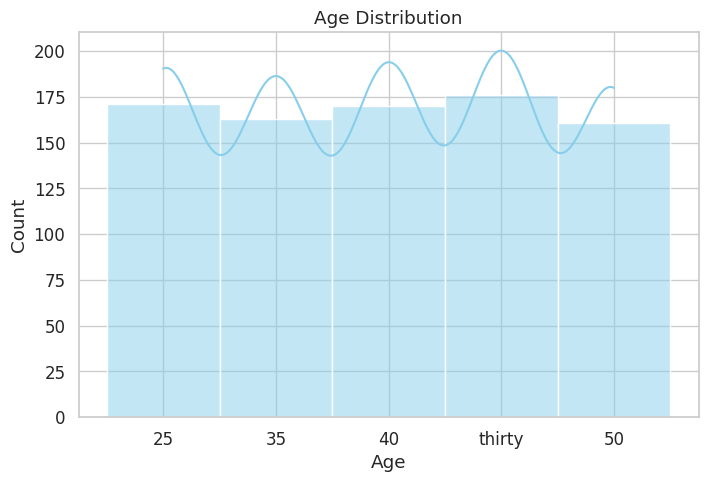

In [ ]:

plt.figure()
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


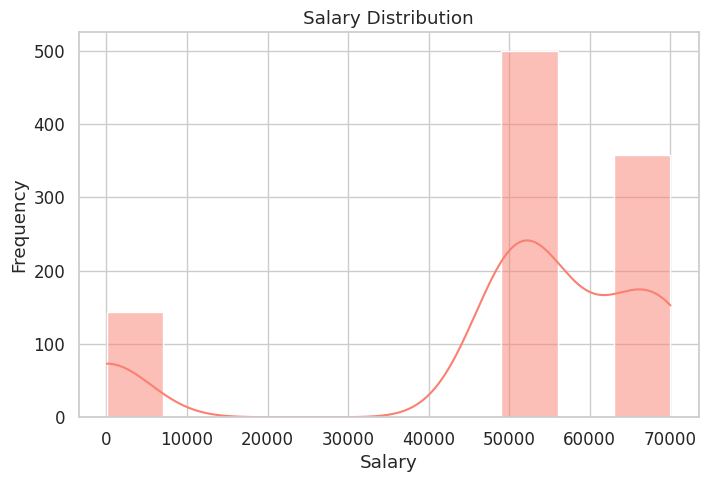

In [ ]:
plt.figure()
sns.histplot(df['Salary'], bins=10, kde=True, color='salmon')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-812575498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


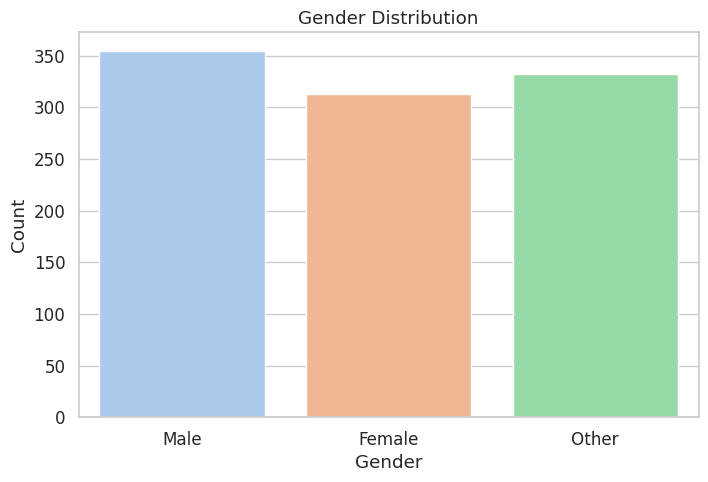

In [ ]:
plt.figure()
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-1591037575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department', data=df, palette='viridis', order=df['Department'].value_counts().index)


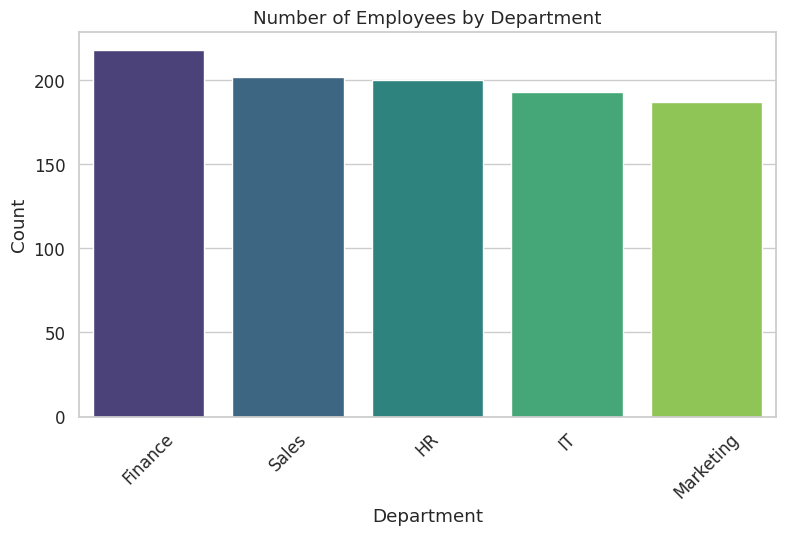

In [ ]:
plt.figure(figsize=(9, 5))
sns.countplot(x='Department', data=df, palette='viridis', order=df['Department'].value_counts().index)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2199075246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Salary', data=df, palette='coolwarm')


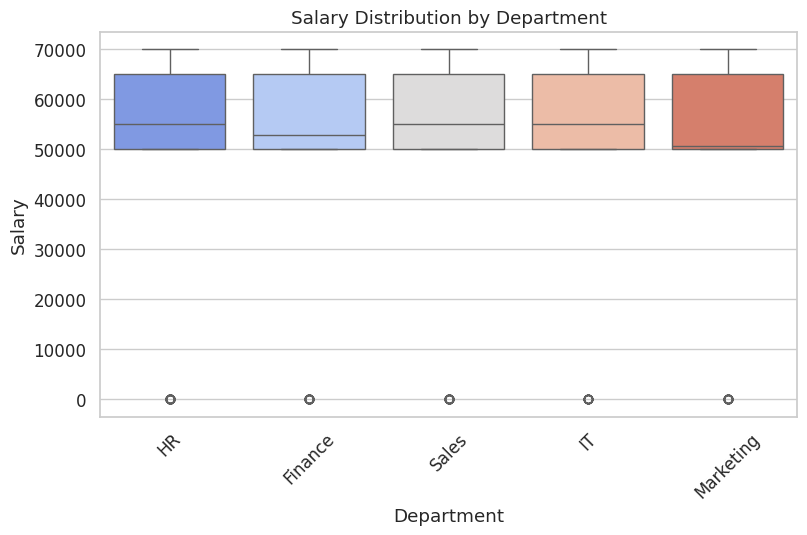

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='Department', y='Salary', data=df, palette='coolwarm')
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3170930681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')


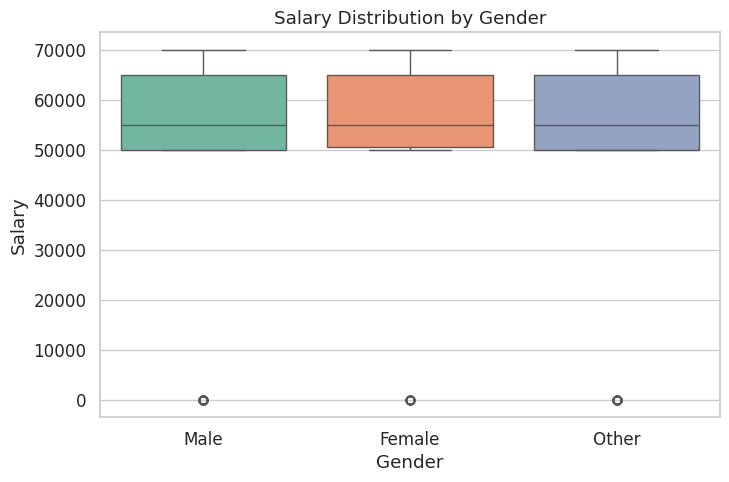

In [ ]:
plt.figure()
sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

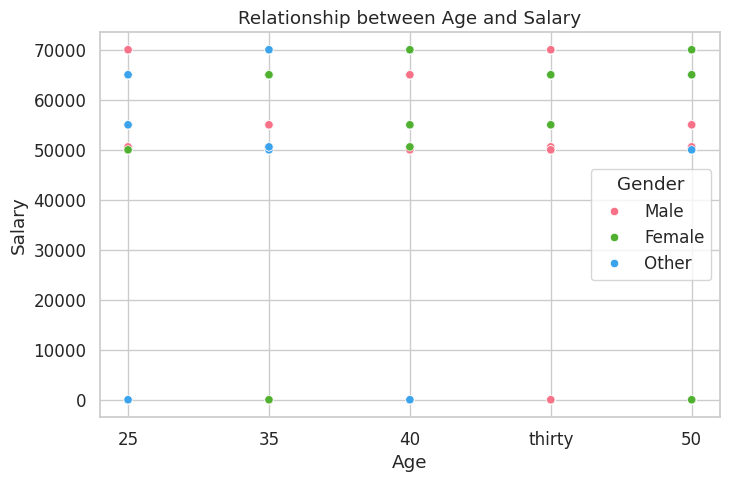

In [ ]:
plt.figure()
sns.scatterplot(x='Age', y='Salary', data=df, hue='Gender', palette='husl')
plt.title('Relationship between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

/tmp/ipython-input-1259815017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Performance Score', data=df, palette='cool')


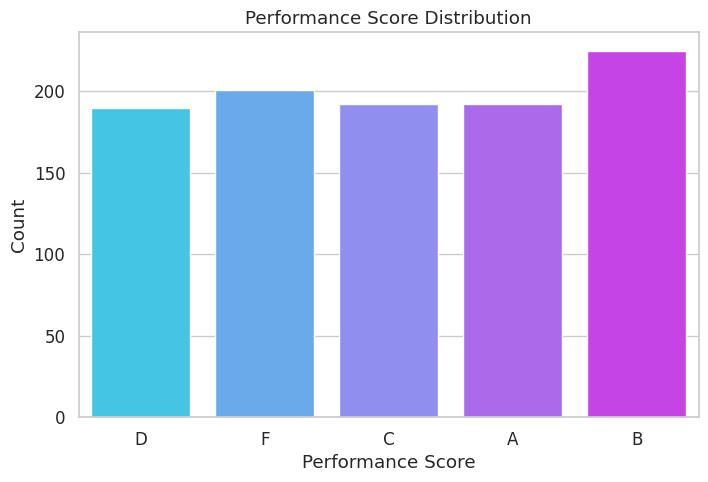

In [ ]:
if 'Performance Score' in df.columns:
    plt.figure()
    sns.countplot(x='Performance Score', data=df, palette='cool')
    plt.title('Performance Score Distribution')
    plt.xlabel('Performance Score')
    plt.ylabel('Count')
    plt.show()

Correlation between Age and Salary: 0.00


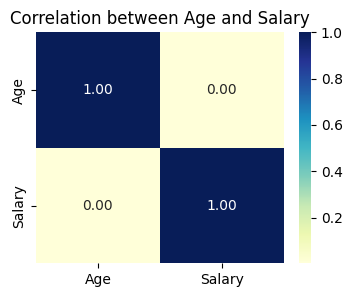

In [ ]:

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# ✅ Step 4: Compute correlation between Age and Salary
corr_value = df[['Age', 'Salary']].corr().iloc[0, 1]
print(f"Correlation between Age and Salary: {corr_value:.2f}")

# ✅ Step 5: Visualize correlation
plt.figure(figsize=(4, 3))
sns.heatmap(df[['Age', 'Salary']].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation between Age and Salary')
plt.show()


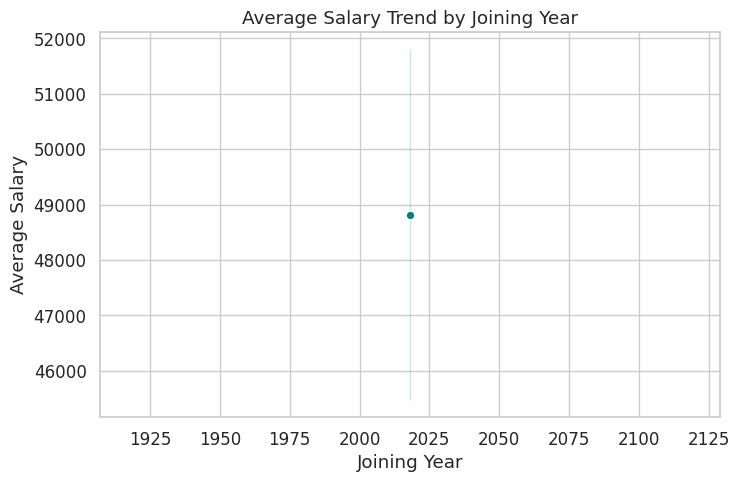

In [ ]:
if 'Joining Date' in df.columns:
    df['Joining Year'] = pd.to_datetime(df['Joining Date'], errors='coerce').dt.year
    plt.figure(figsize=(8, 5))
    sns.lineplot(x='Joining Year', y='Salary', data=df, marker='o', color='teal')
    plt.title('Average Salary Trend by Joining Year')
    plt.xlabel('Joining Year')
    plt.ylabel('Average Salary')
    plt.show()